# Text Preprocessing

##### Author: Alex Sherman | alsherman@deloitte.com

#### Agenga

1. SpaCy
2. Text Tokenization, Tagging, Parsing, NER
3. Text Rule-based matching
4. Text Pipelines
5. Advanced SpaCy Examples

In [1]:
import os
from IPython.core.display import display, HTML
from configparser import ConfigParser, ExtendedInterpolation

config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('../../config.ini')
DB_PATH = config['DATABASES']['PROJECT_DB_PATH']

In [2]:
# confirm DB_PATH is in the correct db directory, otherwise the rest of the code will not work
DB_PATH

'sqlite:///C:\\Users\\alsherman\\Desktop\\PycharmProjects\\firm_initiatives\\ml_guild\\raw_data\\databases\\annual_report.db'

In [3]:
# check for the names of the tables in the database
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(DB_PATH)
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", con=engine)

,name
0,DOCUMENTS
1,SECTIONS


In [4]:
# read the oracle 10k documents 
doc_df = pd.read_sql("SELECT * FROM Documents", con=engine)
doc_df = doc_df[~doc_df.filename.str.contains('1992')]
doc_df.head(3)

,document_id,path,filename,year,document_text,table_text,author,last_modified_by,created,revision,num_tables
3,4,C:\Users\alsherman\Desktop\PycharmProjects\fir...,southwest-airlines-co_annual_report_1994.docx,1994,© 1994 Southwest Airlines Co. This annual repo...,1994 1993 Percent Change Operating revenues $...,,,2018-01-03 22:40:27,0,24
4,5,C:\Users\alsherman\Desktop\PycharmProjects\fir...,southwest-airlines-co_annual_report_1995.docx,1995,Southwest Airlines Co. 1995 Annual Report OUR ...,1995 1994 Percent Change Percent Change Opera...,43945,,2018-01-03 22:40:43,0,32
5,6,C:\Users\alsherman\Desktop\PycharmProjects\fir...,southwest-airlines-co_annual_report_1996.docx,1996,Consolidated Highlights\t2 Introduction\t3 Let...,CONSOLIDATED HIGHLIGHTS (DOLLARS IN THOUSAN...,23133,,2018-01-03 22:40:58,0,24


In [5]:
# read the oracle 10k sections
df = pd.read_sql("SELECT * FROM Sections ", con=engine)
df = df[~df.filename.str.contains('1992')]
df.head(3)

,section_id,filename,section_name,section_text,criteria,section_length
282,283,southwest-airlines-co_annual_report_1994.docx,FIRST SECTION,© 1994 Southwest Airlines Co. This annual repo...,"<, f, u, n, c, t, i, o, n, , h, e, a, d, i, n...",83
283,284,southwest-airlines-co_annual_report_1994.docx,TABLE OF CONTENTS CONSOLIDATED HIGHLIGHTS,(Dollars in thousands except per share amounts...,"<, f, u, n, c, t, i, o, n, , h, e, a, d, i, n...",113
284,285,southwest-airlines-co_annual_report_1994.docx,NET INCOME NET INCOME PER SHARE LOW FARES,"Southwest Airlines was built, from the ground ...","<, f, u, n, c, t, i, o, n, , h, e, a, d, i, n...",1553


In [6]:
df[df.section_text.str.contains('fee')].section_name.head()

291    DEPARTMENT OF TRANSPORTATION RANKINGS FOR 1994...
297                                RESULTS OF OPERATIONS
305                                          ACQUISITION
308    ACCRUED LIABILITIES (IN THOUSANDS) LONG-TERM D...
359        SECRET NUMBER 1 STICK TO WHAT YOU’RE GOOD AT.
Name: section_name, dtype: object

In [7]:
# example text
text = df.section_text[2743]
text

'A complaint alleging violations of federal antitrust laws and seeking certification as a class action was filed against Delta Air Lines, Inc. and AirTran in the United States District Court for the Northern District of Georgia in Atlanta on May 22, 2009. The complaint alleged, among other things, that AirTran attempted to monopolize air travel in violation of Section 2 of the Sherman Act, and conspired with Delta in imposing $15-per-bag fees for the first item of checked luggage in violation of Section 1 of the Sherman Act. The initial complaint sought treble damages on behalf of a putative class of persons or entities in the United States who directly paid Delta and/or AirTran such fees on domestic flights beginning December 5, 2008. After the filing of the May 2009 complaint, various other nearly identical complaints also seeking certification as class actions were filed in federal district courts in Atlanta, Georgia; Orlando, Florida; and Las Vegas, Nevada. All of the cases were co

### SpaCy

SpaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

If you're working with a lot of text, you'll eventually want to know more about it. For example, what's it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

SpaCy is designed specifically for production use and helps you build applications that process and "understand" large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

SpaCy is not research software. It's built on the latest research, but it's designed to get things done. This leads to fairly different design decisions than NLTK or CoreNLP, which were created as platforms for teaching and research. The main difference is that SpaCy is integrated and opinionated. SpaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality. Keeping the menu small lets SpaCy deliver generally better performance and developer experience.

#### Installation:
- Windows: Download Microsoft Visual C++: http://landinghub.visualstudio.com/visual-cpp-build-tools
- conda install -c conda-forge spacy
- python -m spacy download en

##### if you run into an error try the following:
- python -m spacy link en_core_web_sm en
- SOURCE: https://github.com/explosion/spaCy/issues/950

##### Optional to install a convolutional neural network model:
- python -m spacy download en_core_web_lg


### SpaCy Features 

NAME |	DESCRIPTION |
:----- |:------|
Tokenization|Segmenting text into words, punctuations marks etc.|
Part-of-speech (POS) Tagging|Assigning word types to tokens, like verb or noun.|
Dependency Parsing|	Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.|
Lemmatization|	Assigning the base forms of words. For example, the lemma of "was" is "be", and the lemma of "rats" is "rat".|
Sentence Boundary Detection (SBD)|	Finding and segmenting individual sentences.|
Named Entity Recognition (NER)|	Labelling named "real-world" objects, like persons, companies or locations.|
Similarity|	Comparing words, text spans and documents and how similar they are to each other.|
Text Classification|	Assigning categories or labels to a whole document, or parts of a document.|
Rule-based Matching|	Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions.|
Training|	Updating and improving a statistical model's predictions.|
Serialization|	Saving objects to files or byte strings.|

SOURCE: https://spacy.io/usage/spacy-101

In [8]:
# confirm which conda environment you are using - make sure it is one with SpaCy installed
import sys
sys.executable

# if you have difficulty importing spacy try the following in git bash
# conda install ipykernel --name Python3

'C:\\Users\\alsherman\\AppData\\Local\\Continuum\\anaconda3\\envs\\guild\\python.exe'

In [9]:
import spacy
from spacy import displacy

In [10]:
# read in a English language model
#nlp = spacy.load('en')  # simple model
nlp = spacy.load('en_core_web_lg')  # convolutional neural network model

# another approach:
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [11]:
# instantiate the document text
doc = nlp(text)

In [12]:
# view the text from the SpaCy object
doc

A complaint alleging violations of federal antitrust laws and seeking certification as a class action was filed against Delta Air Lines, Inc. and AirTran in the United States District Court for the Northern District of Georgia in Atlanta on May 22, 2009. The complaint alleged, among other things, that AirTran attempted to monopolize air travel in violation of Section 2 of the Sherman Act, and conspired with Delta in imposing $15-per-bag fees for the first item of checked luggage in violation of Section 1 of the Sherman Act. The initial complaint sought treble damages on behalf of a putative class of persons or entities in the United States who directly paid Delta and/or AirTran such fees on domestic flights beginning December 5, 2008. After the filing of the May 2009 complaint, various other nearly identical complaints also seeking certification as class actions were filed in federal district courts in Atlanta, Georgia; Orlando, Florida; and Las Vegas, Nevada. All of the cases were con

### NLP Pipeline

When you read the text into Spacy, e.g. doc = nlp(text), you are applying a pipeline of nlp processes to the text.
by default SpaCy applies a tagger, parser, and ner, but you can choose to add, replace, or remove these steps.
Note: Removing unnecessary steps for a given nlp can lead to substantial descreses in processing time.

In [13]:
spacy_url = 'https://spacy.io/assets/img/pipeline.svg'
iframe = '<iframe src={} width=1000 height=200></iframe>'.format(spacy_url)
HTML(iframe)

### Tokenization

spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas "U.K." should remain one token. 

In [14]:
tokenization_url = 'https://spacy.io/assets/img/tokenization.svg'
iframe = '<iframe src={} width=650 height=400></iframe>'.format(tokenization_url)
HTML(iframe)

### Part-of-speech (POS) Tagging

After tokenization, spaCy can parse and tag a given Doc. This is where the statistical model comes in, which enables spaCy to make a prediction of which tag or label most likely applies in this context. A model consists of binary data and is produced by showing a system enough examples for it to make predictions that generalize across the language – for example, a word following "the" in English is most likely a noun.

Annotation | Description
:----- |:------|
Text |The original word text|
Lemma |The base form of the word.|
POS |The simple part-of-speech tag.|
Tag |The detailed part-of-speech tag.|
Dep |Syntactic dependency, i.e. the relation between tokens.|
Shape |The word shape – capitalisation, punctuation, digits.|
Is Alpha |Is the token an alpha character?|
Is Stop |Is the token part of a stop list, i.e. the most common words of the language?|

In [15]:
# add a list of stop words in SpaCy

from spacy.lang.en.stop_words import STOP_WORDS
for word in STOP_WORDS:
    # search for the word in the SpaCy vocabulary
    lexeme = nlp.vocab[word]
    # change the is_stop attribute to True (default is False)
    lexeme.is_stop = True

In [16]:
# print column headers
print('{:15} | {:15} | {:8} | {:8} | {:11} | {:8} | {:8} | {:8} | '.format(
    'TEXT','LEMMA_','POS_','TAG_','DEP_','SHAPE_','IS_ALPHA','IS_STOP'))

# print various SpaCy POS attributes
for token in doc:
    print('{:15} | {:15} | {:8} | {:8} | {:11} | {:8} | {:8} | {:8} |'.format(
          token.text, token.lemma_, token.pos_, token.tag_, token.dep_
        , token.shape_, token.is_alpha, token.is_stop))

TEXT            | LEMMA_          | POS_     | TAG_     | DEP_        | SHAPE_   | IS_ALPHA | IS_STOP  | 
A               | a               | DET      | DT       | det         | X        |        1 |        0 |
complaint       | complaint       | NOUN     | NN       | ROOT        | xxxx     |        1 |        0 |
alleging        | allege          | VERB     | VBG      | acl         | xxxx     |        1 |        0 |
violations      | violation       | NOUN     | NNS      | dobj        | xxxx     |        1 |        0 |
of              | of              | ADP      | IN       | prep        | xx       |        1 |        1 |
federal         | federal         | ADJ      | JJ       | amod        | xxxx     |        1 |        0 |
antitrust       | antitrust       | ADJ      | JJ       | amod        | xxxx     |        1 |        0 |
laws            | law             | NOUN     | NNS      | pobj        | xxxx     |        1 |        0 |
and             | and             | CCONJ    | CC     

were            | be              | VERB     | VBD      | auxpass     | xxxx     |        1 |        1 |
filed           | file            | VERB     | VBN      | advcl       | xxxx     |        1 |        0 |
in              | in              | ADP      | IN       | prep        | xx       |        1 |        1 |
federal         | federal         | ADJ      | JJ       | amod        | xxxx     |        1 |        0 |
district        | district        | NOUN     | NN       | compound    | xxxx     |        1 |        0 |
courts          | court           | NOUN     | NNS      | pobj        | xxxx     |        1 |        0 |
in              | in              | ADP      | IN       | prep        | xx       |        1 |        1 |
Atlanta         | atlanta         | PROPN    | NNP      | pobj        | Xxxxx    |        1 |        0 |
,               | ,               | PUNCT    | ,        | punct       | ,        |        0 |        0 |
Georgia         | georgia         | PROPN    | NNP     

the             | the             | DET      | DT       | det         | xxx      |        1 |        1 |
claims          | claim           | NOUN     | NNS      | dobj        | xxxx     |        1 |        0 |
of              | of              | ADP      | IN       | prep        | xx       |        1 |        1 |
a               | a               | DET      | DT       | det         | x        |        1 |        1 |
conspiracy      | conspiracy      | NOUN     | NN       | pobj        | xxxx     |        1 |        0 |
with            | with            | ADP      | IN       | prep        | xxxx     |        1 |        1 |
respect         | respect         | NOUN     | NN       | pobj        | xxxx     |        1 |        0 |
to              | to              | ADP      | IN       | prep        | xx       |        1 |        1 |
the             | the             | DET      | DT       | det         | xxx      |        1 |        1 |
imposition      | imposition      | NOUN     | NN      

entered         | enter           | VERB     | VBD      | ROOT        | xxxx     |        1 |        0 |
an              | an              | DET      | DT       | det         | xx       |        1 |        1 |
order           | order           | NOUN     | NN       | dobj        | xxxx     |        1 |        0 |
granting        | grant           | VERB     | VBG      | acl         | xxxx     |        1 |        0 |
class           | class           | NOUN     | NN       | compound    | xxxx     |        1 |        0 |
certification   | certification   | NOUN     | NN       | dobj        | xxxx     |        1 |        0 |
,               | ,               | PUNCT    | ,        | punct       | ,        |        0 |        0 |
which           | which           | ADJ      | WDT      | nsubjpass   | xxxx     |        1 |        1 |
was             | be              | VERB     | VBD      | auxpass     | xxx      |        1 |        1 |
vacated         | vacate          | VERB     | VBN     

and             | and             | CCONJ    | CC       | cc          | xxx      |        1 |        1 |
documents       | document        | NOUN     | NNS      | conj        | xxxx     |        1 |        0 |
about           | about           | ADP      | IN       | prep        | xxxx     |        1 |        1 |
the             | the             | DET      | DT       | det         | xxx      |        1 |        1 |
Company         | company         | PROPN    | NNP      | poss        | Xxxxx    |        1 |        0 |
’s              | ’s              | PART     | POS      | case        | ’x       |        0 |        0 |
capacity        | capacity        | NOUN     | NN       | pobj        | xxxx     |        1 |        0 |
from            | from            | ADP      | IN       | prep        | xxxx     |        1 |        1 |
January         | january         | PROPN    | NNP      | pobj        | Xxxxx    |        1 |        0 |
2010            | 2010            | NUM      | CD      

Sherman         | sherman         | PROPN    | NNP      | compound    | Xxxxx    |        1 |        0 |
Act             | act             | PROPN    | NNP      | pobj        | Xxx      |        1 |        0 |
.               | .               | PUNCT    | .        | punct       | .        |        0 |        0 |
Since           | since           | ADP      | IN       | prep        | Xxxxx    |        1 |        0 |
then            | then            | ADV      | RB       | pcomp       | xxxx     |        1 |        1 |
,               | ,               | PUNCT    | ,        | punct       | ,        |        0 |        0 |
a               | a               | DET      | DT       | det         | x        |        1 |        1 |
number          | number          | NOUN     | NN       | nsubjpass   | xxxx     |        1 |        0 |
of              | of              | ADP      | IN       | prep        | xx       |        1 |        1 |
similar         | similar         | ADJ      | JJ      

and             | and             | CCONJ    | CC       | cc          | xxx      |        1 |        1 |
injunctive      | injunctive      | ADJ      | JJ       | amod        | xxxx     |        1 |        0 |
relief          | relief          | NOUN     | NN       | conj        | xxxx     |        1 |        0 |
.               | .               | PUNCT    | .        | punct       | .        |        0 |        0 |
On              | on              | ADP      | IN       | ROOT        | Xx       |        1 |        0 |
October         | october         | PROPN    | NNP      | pobj        | Xxxxx    |        1 |        0 |
13              | 13              | NUM      | CD       | nummod      | dd       |        0 |        0 |
,               | ,               | PUNCT    | ,        | punct       | ,        |        0 |        0 |
2015            | 2015            | NUM      | CD       | appos       | dddd     |        0 |        0 |
,               | ,               | PUNCT    | ,       

Company         | company         | PROPN    | NNP      | nsubj       | Xxxxx    |        1 |        0 |
to              | to              | PART     | TO       | aux         | xx       |        1 |        1 |
respond         | respond         | VERB     | VB       | relcl       | xxxx     |        1 |        0 |
to              | to              | ADP      | IN       | prep        | xx       |        1 |        1 |
the             | the             | DET      | DT       | det         | xxx      |        1 |        1 |
complaints      | complaint       | NOUN     | NNS      | pobj        | xxxx     |        1 |        0 |
has             | have            | VERB     | VBZ      | aux         | xxx      |        1 |        1 |
not             | not             | ADV      | RB       | neg         | xxx      |        1 |        1 |
yet             | yet             | ADV      | RB       | advmod      | xxx      |        1 |        1 |
expired         | expire          | VERB     | VBN     

### Text Dependency Parsing

spaCy features a fast and accurate syntactic dependency parser, and has a rich API for navigating the tree. The parser also powers the sentence boundary detection, and lets you iterate over base noun phrases, or "chunks". You can check whether a Doc  object has been parsed with the doc.is_parsed attribute, which returns a boolean value. If this attribute is False, the default sentence iterator will raise an exception.

In [17]:
print('{:15} | {:10} | {:10} | {:10} | {:30} | {:25}'.format(
    'TEXT','ROOT','DEPENDENCY','ROOT_TEXT','CHILDREN','LEFTS'))

for token in doc:
    print('{:15} | {:10} | {:10} | {:10} | {:30} | {:25}'.format(token.text, token.dep_, token.head.text, token.head.pos_,
          str([child for child in token.children]),str([t.text for t in token.lefts])))

TEXT            | ROOT       | DEPENDENCY | ROOT_TEXT  | CHILDREN                       | LEFTS                    
A               | det        | complaint  | NOUN       | []                             | []                       
complaint       | ROOT       | complaint  | NOUN       | [A, alleging, .]               | ['A']                    
alleging        | acl        | complaint  | NOUN       | [violations, and, seeking]     | []                       
violations      | dobj       | alleging   | VERB       | [of]                           | []                       
of              | prep       | violations | NOUN       | [laws]                         | []                       
federal         | amod       | laws       | NOUN       | []                             | []                       
antitrust       | amod       | laws       | NOUN       | []                             | []                       
laws            | pobj       | of         | ADP        | [federal, antit

the             | det        | complaint  | NOUN       | []                             | []                       
May             | nmod       | complaint  | NOUN       | [2009]                         | []                       
2009            | nummod     | May        | PROPN      | []                             | []                       
complaint       | pobj       | of         | ADP        | [the, May]                     | ['the', 'May']           
,               | punct      | seeking    | VERB       | []                             | []                       
various         | amod       | complaints | NOUN       | []                             | []                       
other           | amod       | complaints | NOUN       | []                             | []                       
nearly          | advmod     | identical  | ADJ        | []                             | []                       
identical       | amod       | complaints | NOUN       | [nearly]       

as              | cc         | activities | NOUN       | [as, well]                     | ['as', 'well']           
attorneys’      | compound   | fees       | NOUN       | []                             | []                       
fees            | conj       | activities | NOUN       | [attorneys’]                   | ['attorneys’']           
.               | punct      | seeks      | VERB       | []                             | []                       
On              | prep       | dismissed  | VERB       | [August]                       | []                       
August          | pobj       | On         | ADP        | [2, ,, 2010]                   | []                       
2               | nummod     | August     | PROPN      | []                             | []                       
,               | punct      | August     | PROPN      | []                             | []                       
2010            | appos      | August     | PROPN      | []             

Delta           | conj       | AirTran    | PROPN      | []                             | []                       
conspired       | acl        | claim      | NOUN       | [that, AirTran, reduce]        | ['that', 'AirTran']      
to              | aux        | reduce     | VERB       | []                             | []                       
reduce          | xcomp      | conspired  | VERB       | [to, capacity]                 | ['to']                   
capacity        | dobj       | reduce     | VERB       | []                             | []                       
.               | punct      | filed      | VERB       | []                             | []                       
On              | prep       | moved      | VERB       | [August]                       | []                       
August          | pobj       | On         | ADP        | [31, ,, 2012]                  | []                       
31              | nummod     | August     | PROPN      | []             

decision        | pobj       | for        | ADP        | []                             | []                       
.               | punct      | submitted  | VERB       | []                             | []                       
AirTran         | nsubj      | denies     | VERB       | []                             | []                       
denies          | ROOT       | denies     | VERB       | [AirTran, allegations, ,, and, intends, .] | ['AirTran']              
all             | det        | allegations | NOUN       | []                             | []                       
allegations     | dobj       | denies     | VERB       | [all, of, ,, including]        | ['all']                  
of              | prep       | allegations | NOUN       | [wrongdoing]                   | []                       
wrongdoing      | pobj       | of         | ADP        | []                             | []                       
,               | punct      | allegations | NOUN       | 

the             | det        | present    | NOUN       | []                             | []                       
present         | pobj       | to         | ADP        | [the]                          | ['the']                  
.               | punct      | issued     | VERB       | []                             | []                       
The             | det        | Company    | PROPN      | []                             | []                       
Company         | nsubj      | cooperating | VERB       | [The]                          | ['The']                  
is              | aux        | cooperating | VERB       | []                             | []                       
cooperating     | ROOT       | cooperating | VERB       | [Company, is, fully, with, .]  | ['Company', 'is']        
fully           | advmod     | cooperating | VERB       | []                             | []                       
with            | prep       | cooperating | VERB       | [CID]     

Northern        | compound   | District   | PROPN      | []                             | []                       
District        | conj       | District   | PROPN      | [the, Northern, of, ,, District] | ['the', 'Northern']      
of              | prep       | District   | PROPN      | [Illinois]                     | []                       
Illinois        | pobj       | of         | ADP        | []                             | []                       
,               | punct      | District   | PROPN      | []                             | []                       
the             | det        | District   | PROPN      | []                             | []                       
Southern        | compound   | District   | PROPN      | []                             | []                       
District        | conj       | District   | PROPN      | [the, Southern, of, ,, District] | ['the', 'Southern']      
of              | prep       | District   | PROPN      | [Indiana]  

not             | neg        | entered    | VERB       | []                             | []                       
yet             | advmod     | entered    | VERB       | []                             | []                       
entered         | ROOT       | entered    | VERB       | [Court, has, not, yet, order, .] | ['Court', 'has', 'not', 'yet']
a               | det        | order      | NOUN       | []                             | []                       
scheduling      | compound   | order      | NOUN       | []                             | []                       
order           | dobj       | entered    | VERB       | [a, scheduling, establishing]  | ['a', 'scheduling']      
establishing    | acl        | order      | NOUN       | [date, respond]                | []                       
a               | det        | date       | NOUN       | []                             | []                       
date            | dobj       | establishing | VERB       | [a]   

to              | prep       | from       | ADP        | [time]                         | []                       
time            | pobj       | to         | ADP        | []                             | []                       
subject         | amod       | from       | ADP        | [to]                           | []                       
to              | prep       | subject    | ADJ        | [proceedings]                  | []                       
various         | amod       | proceedings | NOUN       | []                             | []                       
legal           | amod       | proceedings | NOUN       | []                             | []                       
proceedings     | pobj       | to         | ADP        | [various, legal, and, claims, arising, ,, including] | ['various', 'legal']     
and             | cc         | proceedings | NOUN       | []                             | []                       
claims          | conj       | proceedings | NO

#### NOUN CHUNCKS:

| **TERM** | Definition |
|:---|:---:|
| **Text** | The original noun chunk text |
| **Root text** | The original text of the word connecting the noun chunk to the rest of the parse |
| **Root dependency** | Dependency relation connecting the root to its head |
| **Root head text** | The text of the root token's head |

In [18]:
print('{:15} | {:10} | {:10} | {:40}'.format('ROOT_TEXT','ROOT','DEPENDENCY','TEXT'))

for chunk in doc.noun_chunks:
    print('{:15} | {:10} | {:10} | {:40}'.format(
        chunk.root.text, chunk.root.dep_, chunk.root.head.text, chunk.text))

ROOT_TEXT       | ROOT       | DEPENDENCY | TEXT                                    
complaint       | ROOT       | complaint  | A complaint                             
violations      | dobj       | alleging   | violations                              
laws            | pobj       | of         | federal antitrust laws                  
certification   | dobj       | seeking    | certification                           
action          | nsubjpass  | filed      | a class action                          
Lines           | pobj       | against    | Delta Air Lines                         
Inc.            | conj       | Lines      | Inc.                                    
AirTran         | conj       | Inc.       | AirTran                                 
Court           | pobj       | in         | the United States District Court        
District        | pobj       | for        | the Northern District                   
Georgia         | pobj       | of         | Georgia              

Company         | nsubj      | cooperating | The Company                             
CID             | pobj       | with       | the DOJ CID                             
inquiries       | conj       | CID        | these two state inquiries               
July            | pobj       | on         | July                                    
complaint       | nsubjpass  | filed      | a complaint                             
Court           | pobj       | in         | the United States District Court        
District        | pobj       | for        | the Southern District                   
York            | pobj       | of         | New York                                
behalf          | pobj       | on         | behalf                                  
classes         | pobj       | of         | putative classes                        
consumers       | pobj       | of         | consumers                               
collusion       | dobj       | alleging   | collusion           

In [19]:
# dependency visualization
# after you run this code, open another browser and go to http://localhost:5000
# when you are done (before you run the next cell in the notebook) stop this cell
displacy.serve(docs=doc, style='dep')

# Another option: show visualization in Jupyter Notebook
#displacy.render(docs=doc, style='dep', jupyter=True)

### Named Entity Recognition (NER)

A named entity is a "real-world object" that's assigned a name – for example, a person, a country, a product, or a book title. spaCy can recognise various types of named entities in a document, by asking the model for a prediction. 

In [21]:
print('{:10} | {:15} '.format('LABEL','ENTITY'))

for ent in doc.ents:
    print('{:10} | {:50} '.format(ent.label_, ent.text))

LABEL      | ENTITY          
ORG        | Delta Air Lines                                    
ORG        | AirTran                                            
GPE        | the United States District Court                   
LOC        | the Northern District                              
GPE        | Georgia                                            
GPE        | Atlanta                                            
DATE       | May 22, 2009                                       
ORG        | AirTran                                            
LAW        | Section 2                                          
LAW        | the Sherman Act                                    
ORG        | Delta                                              
ORDINAL    | first                                              
LAW        | Section 1                                          
LAW        | the Sherman Act                                    
GPE        | the United States                              

In [22]:
# entity visualization
# after you run this code, open another browser and go to http://localhost:5000
# when you are done (before you run the next cell in the notebook) stop this cell 

displacy.serve(doc, style='ent')


    Serving on port 5000...
    Using the 'ent' visualizer


    Shutting down server on port 5000.



In [35]:
# observe the named entities tagged as a law
set(ent.text for ent in doc.ents if 'LAW' in ent.label_)

{'Section 1',
 'Section 2',
 'Section 2 of the Sherman Act',
 'Stipulation and Order',
 'the Sherman Act'}

In [36]:
# observe the named entities tagged as geopolitical entity
print(set(ent.text for ent in doc.ents if 'GPE' in ent.label_))

{'the District of Oklahoma', 'Louisiana', 'the District of Minnesota', 'Connecticut', 'Quebec', 'the United States', 'the United States District Court', 'North Carolina', 'Pennsylvania', 'the District of Columbia', 'Wisconsin', 'British Columbia', 'Georgia', 'the District of Vermont', 'Texas', 'Illinois', 'the District of New Jersey', 'Canada', 'Atlanta', 'Ontario', 'Las Vegas', 'Florida', 'Indiana', 'New York', 'California', 'Saskatchewan', 'Nevada', 'the United States District Courts', 'Orlando', 'Multi-District  '}


##### Collections - Counter

A Counter is a dict subclass for counting hashable objects. It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. The Counter class is similar to bags or multisets in other languages.

SOURCE: https://docs.python.org/2/library/collections.html#collections.Counter

In [37]:
# count the number of times each GPE appears

from collections import Counter
print(Counter(ent.text for ent in doc.ents if 'GPE' in ent.label_))

Counter({'Canada': 3, 'the United States': 3, 'Atlanta': 3, 'Florida': 3, 'New York': 3, 'Georgia': 3, 'the United States District Court': 2, 'the District of Columbia': 2, 'California': 2, 'the District of Oklahoma': 1, 'Louisiana': 1, 'the District of Minnesota': 1, 'Connecticut': 1, 'Quebec': 1, 'Multi-District  ': 1, 'the District of Vermont': 1, 'the District of New Jersey': 1, 'Ontario': 1, 'Las Vegas': 1, 'Pennsylvania': 1, 'Indiana': 1, 'Wisconsin': 1, 'British Columbia': 1, 'Saskatchewan': 1, 'Nevada': 1, 'Texas': 1, 'the United States District Courts': 1, 'Orlando': 1, 'Illinois': 1, 'North Carolina': 1})


### Identify Relevant Text (Rule-based Matching)

Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions. We will use this to filter and extract relevant text.

In [38]:
rule_basesd_matching_url = 'https://spacy.io/usage/linguistic-features#rule-based-matching'
iframe = '<iframe src={} width=1000 height=700></iframe>'.format(rule_basesd_matching_url)
HTML(iframe)

In [39]:
# The Matcher identifies text from rules we specify
from spacy.matcher import Matcher

In [40]:
# create a function to specify what to do with the matching text

def collect_sents(matcher, doc, i, matches):
    """  collect and transform matching text

    :param matcher: Matcher object
    :param doc: is the full document to search for text patterns
    :param i: is the index of the text matches
    :param matches: matches found in the text
    """
    
    match_id, start, end = matches[i]  # indices of matched term
    span = doc[start:end]              # extract matched term
    
    print('span: {} | start_ind:{:5} | end_ind:{:5} | id:{}'.format(
        span, start, end, match_id))

In [41]:
# set a pattern of text to collect
# find all mentions of the word fees 
pattern = [{'LOWER':'fees'}] # LOWER coverts words to lowercase before matching

# instantiate matcher
matcher = Matcher(nlp.vocab)

# add pattern to the matcher (one matcher can look for many unique patterns)
# provice a pattern name, function to apply to matches, pattern to identify
matcher.add('fee', collect_sents, pattern)

# pass the doc to the matcher to run the collect_sents function
matcher(doc)

span: fees | start_ind:   80 | end_ind:   81 | id:7125196598045271428
span: fees | start_ind:  125 | end_ind:  126 | id:7125196598045271428
span: fees | start_ind:  252 | end_ind:  253 | id:7125196598045271428
span: fees | start_ind:  281 | end_ind:  282 | id:7125196598045271428
span: fees | start_ind:  933 | end_ind:  934 | id:7125196598045271428


[(7125196598045271428, 80, 81),
 (7125196598045271428, 125, 126),
 (7125196598045271428, 252, 253),
 (7125196598045271428, 281, 282),
 (7125196598045271428, 933, 934)]

In [42]:
# change the function to print the sentence of the matched term (span)

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
    print('SPAN: {}'.format(span))

    # span.sent provides the sentence that contains the span
    print('SENT: {}'.format(span.sent))
    print()


# update the pattern to look for any noun preceeding the term 'fees'
pattern = [{'POS': 'NOUN', 'OP': '+'},{'LOWER':'fees'}]
matcher = Matcher(nlp.vocab)  # reinstantiate the matcher to remove previous patterns
matcher.add('fee', collect_sents, pattern)
matcher(doc)

SPAN: bag fees
SENT: The complaint alleged, among other things, that AirTran attempted to monopolize air travel in violation of Section 2 of the Sherman Act, and conspired with Delta in imposing $15-per-bag fees for the first item of checked luggage in violation of Section 1 of the Sherman Act.

SPAN: baggage fees
SENT: In addition to treble damages for the amount of first baggage fees paid to  AirTran and to Delta, the Consolidated Amended Complaint seeks injunctive relief against a broad range of alleged anticompetitive activities, as well as attorneys’ fees.

SPAN: attorneys’ fees
SENT: In addition to treble damages for the amount of first baggage fees paid to  AirTran and to Delta, the Consolidated Amended Complaint seeks injunctive relief against a broad range of alleged anticompetitive activities, as well as attorneys’ fees.

SPAN: attorneys’ fees
SENT: The complaints seek treble damages for periods that vary among the complaints, costs, attorneys’ fees, and injunctive relief.



[(7125196598045271428, 79, 81),
 (7125196598045271428, 251, 253),
 (7125196598045271428, 280, 282),
 (7125196598045271428, 932, 934)]

In [43]:
# change the function to collect sentences

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
        
    # update matched data collections
    matched_sents.append(span.sent)


matched_sents = []  # container for sentences
pattern = [{'POS': 'NOUN', 'OP': '+'},{'LOWER':'fees'}]
matcher = Matcher(nlp.vocab)
matcher.add('fee', collect_sents, pattern)
matcher(doc)

[(7125196598045271428, 79, 81),
 (7125196598045271428, 251, 253),
 (7125196598045271428, 280, 282),
 (7125196598045271428, 932, 934)]

In [44]:
# review matches
set(matched_sents)

{The complaint alleged, among other things, that AirTran attempted to monopolize air travel in violation of Section 2 of the Sherman Act, and conspired with Delta in imposing $15-per-bag fees for the first item of checked luggage in violation of Section 1 of the Sherman Act.,
 In addition to treble damages for the amount of first baggage fees paid to  AirTran and to Delta, the Consolidated Amended Complaint seeks injunctive relief against a broad range of alleged anticompetitive activities, as well as attorneys’ fees.,
 The complaints seek treble damages for periods that vary among the complaints, costs, attorneys’ fees, and injunctive relief.}

##### DefaultDict

Usually, a Python dictionary throws a KeyError if you try to get an item with a key that is not currently in the dictionary. The defaultdict in contrast will simply create any items that you try to access (provided of course they do not exist yet). To create such a "default" item, it calls the function object that you pass in the constructor (more precisely, it's an arbitrary "callable" object, which includes function and type objects). For the first example, default items are created using int(), which will return the integer object 0. For the second example, default items are created using list(), which returns a new empty list object.

In [45]:
sentence = ['The','airline','baggage','fees','and','food','fees','are','outrageous']

In [46]:
# WRONG APPROACH - KeyError!

# try to create a word count dict with new keys
d = {}
for word in sentence:
    d[word] += 1  # cannot add if the key does not exist

print(d)

KeyError: 'The'

In [47]:
from collections import defaultdict

d = defaultdict(int)  # define the type of data the dict stores
for word in sentence:
    d[word] += 1  # can add to unassigned keys

print(d)

defaultdict(<class 'int'>, {'fees': 2, 'food': 1, 'and': 1, 'The': 1, 'baggage': 1, 'outrageous': 1, 'airline': 1, 'are': 1})


In [48]:
# change the function to count matches using defaultdict

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
    
    # update matched data collections
    ent_count[span.text] += 1  # defaultdict keys must use span.text not span!


ent_count = defaultdict(int)
pattern = [{'LOWER':'fees'}]
matcher = Matcher(nlp.vocab)
matcher.add('fees', collect_sents, pattern)
matcher(doc)

ent_count

defaultdict(int, {'fees': 5})

In [49]:
# update the pattern to look for a noun describing the fee

ent_count = defaultdict(int)
pattern = [{'POS': 'NOUN', 'OP': '+'},{'LOWER':'fees'}]
matcher = Matcher(nlp.vocab)
matcher.add('fee', collect_sents, pattern)
matcher(doc)

ent_count

defaultdict(int, {'attorneys’ fees': 2, 'bag fees': 1, 'baggage fees': 1})

# Pipeline

If you have a sequence of documents to process, you should use the Language.pipe()  method. The method takes an iterator of texts, and accumulates an internal buffer, which it works on in parallel. It then yields the documents in order, one-by-one.

- batch_size: number of docs to process per thread
- n_threads: number threads to use (-1 is the default that let's SpaCy decide)
- disable: Names of pipeline components to disable to speed up text processing.

In [50]:
from spacy.pipeline import Pipe

In [51]:
# get multiple sections with the term fees
# use SpaCy to determine what type of fees

texts = df[df['section_text'].str.contains('fee')]['section_text'].values[0:5]

In [52]:
%%time

ent_count = defaultdict(int) # reset defaultdict

for doc in nlp.pipe(texts): #['parser','tagger','ner']
    matcher(doc) # match on your text

print(ent_count)

defaultdict(<class 'int'>, {'landing fees': 1})
Wall time: 21.7 s


### SpaCy - Tips for faster processing

You can substantially speed up the time it takes SpaCy to read a document by disabling components of the NLP that are not necessary for a given task.

- Disable options: **parser, tagger, ner**

In [53]:
%%time

# reset defaultdict
ent_count = defaultdict(int)

# disable the parser and ner, as we only use POS tagging in this example
# processing occurs ~5x faster
for doc in nlp.pipe(texts, batch_size=100, disable=['parser','ner']):  
    matcher(doc) # match on your text

print(ent_count)

defaultdict(<class 'int'>, {'landing fees': 1})
Wall time: 4.98 s


In [54]:
%%time

ent_count = defaultdict(int) # reset defaultdict

# disable the parser and ner, as we only use POS tagging in this example
# processing occurs ~75x faster, but doesn't work as the tagger is needed
for doc in nlp.pipe(texts, batch_size=100, disable=['parser','tagger','ner']):
    matcher(doc) # match on your text

print(ent_count)

defaultdict(<class 'int'>, {})
Wall time: 200 ms


### Analyze the different risk types by year

In [55]:
# get multiple sections with the term fees
texts = df[df['section_text'].str.contains('fees')][['filename','section_text']].values
len(texts)

159

In [56]:
# These fee types were extracted using the below code. 
# For the purpose of the lesson, instead of running it twice I have pulled them out
# and grouped similar fees

fee_types = {
    'Landing fees':'landing'
  , 'agriculture inspection fees':'agriculture'
  , 'attorneys fees':'attorneys'
  , 'attorneys’ fees':'attorneys'
  , 'bag fees':'bag'
  , 'baggage fees':'bag'
  , 'card fees':'card'
  , 'card interchange fees':'card'
  , 'card processing fees':'card'
  , 'change fees':'change'
  , 'credit card fees':'card'
  , 'credit card interchange fees':'card'
  , 'credit card processing fees':'card'
  , 'customs fees':'customs'
  , 'enplanement fees':'enplanement'
  , 'experts’ fees':'experts'
  , 'inspection fees':'inspection'
  , 'interchange fees':'interchange'
  , 'l1nding fees':'landing'
  , 'landing fees':'landing'
  , 'passenger fees':'passenger'
  , 'printing fees':'printing'
  , 'processing fees':'processing'
  , 'refund passenger fees':'refund'
  , 'security fees':'security'
  , 'service fees':'service'
  , 'user fees':'user'}

In [57]:
# dict get - returns value if key is in dict, otherwise returns a value of your choice
print(fee_types.get('user fees', 'return this if the key is not in the dict'))
print(fee_types.get('not a value', 'return this if the key is not in the dict'))

user
return this if the key is not in the dict


In [58]:
# create simple matcher function and pattern

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
    # replace the fee type
    fee = fee_types.get(span.text, span.text)
    ent_count[fee] += 1
    
pattern = [{'POS': 'NOUN', 'OP': '+'},{'LOWER':'fees'}]
matcher = Matcher(nlp.vocab)
matcher.add('risk', collect_sents, pattern)

In [59]:
%%time

years = defaultdict(dict)
for year, text in texts:
    ent_count = defaultdict(int)               # reset ent_count for each year
    doc = nlp(text, disable=['parser','ner'])  # disable unnessecary components
    matcher(doc)                               # match on your text
    
    for key, val in ent_count.items():
        years[year][key] = val

Wall time: 3min 56s


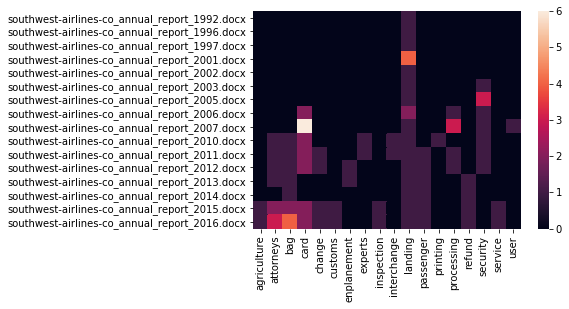

In [61]:
# view the fees by year|
%matplotlib inline
import seaborn as sns

sns.heatmap(pd.DataFrame(years).T.fillna(0))

### Exercise review risks by year

## Advanced SpaCy (Bonus Material)

##### Text Matching: Avoid Multiple Term Matches

When using rule-based matching, SpaCy may match the same term multiple times if it is part of different n-term pairs with one term contained in another. For instance, 'integration services' in 'system integration services.'

To avoid matching these terms multiple times, we can add to the collect_sents function to check if each term is contained in the previous term

In [ ]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
    sent = span.sent
    
    # lemmatize the matched spans
    entity = span.lemma_.lower()
            
    # explicity add the first entity without checking if it matches other terms
    # as there is no previous span to check    
    if i == 0:
        ent_count[entity] += 1
        ent_sents[entity].append(sent)
        matched_sents.append(sent)
        return

    # get the span, entity, and sentence from the previous match
    # if more than one match exist
    last_match_id, last_start, last_end = matches[i-1]
    last_span = doc[last_start : last_end]
    last_entity = last_span.text.lower()
    last_sent = last_span.sent

    # to avoid adding duplicates when one term is contained in another 
    # (e.g. 'integration services' in 'system integration services')
    # make sure new spans are unique
    distinct_entity = (entity not in last_entity) or (sent != last_sent)
    not_duplicate_entity = (entity != last_entity) or (sent != last_sent)
    
    # update collections for unique data
    if distinct_entity and not_duplicate_entity:
        ent_count[entity] += 1
        ent_sents[entity].append(sent)
        matched_sents.append(sent)

##### Multiple Patterns

SpaCy matchers can use multiple patterns. Each pattern can be added to the Matcher individually with match.add and can use their own collect_sents function. Or use *patterns to add multiple patterns to the matcher at once.

In [ ]:
matched_sents = []
ent_sents  = defaultdict(list)
ent_count = defaultdict(int)

# multiple patterns
pattern = [[{'POS': 'NOUN', 'OP': '+'},{'LOWER': 'fee'}]
           , [{'POS': 'NOUN', 'OP': '+'},{'LOWER': 'fees'}]]
matcher = Matcher(nlp.vocab)

# *patterns to add multiple patterns with the same collect_sents function
matcher.add('all_fees', collect_sents, *pattern)

texts = df[df['section_text'].str.contains('fee')]['section_text'].values[0:5]
for doc in nlp.pipe(texts, batch_size=100, disable=['ner']):
    matches = matcher(doc) 

In [ ]:
ent_count

In [ ]:
ent_sents

#### Text Preprocessing Example

In [ ]:
def clean_text(doc): 
    # Add named entities, but only if they are a compound of more than non-numeric word.
    IGNORE_ENTS = ('QUANTITY','ORDINAL','CARDINAL','DATE'
                   ,'PERCENT','MONEY','TIME')
    ents = doc.ents
    ents = [ent for ent in ents if 
             (ent.label_ not in IGNORE_ENTS) and (len(ent) > 2)]
    
    # add underscores to combine words in entities
    ents = [str(ent).strip().replace(' ','_') for ent in ents]
 
    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc 
           if token.is_alpha and not token.is_stop]
    
    doc.extend([entity for entity in ents])
    
    return [str(term) for term in doc]

In [ ]:
%%time

cleaned_text = []
for sent in matched_sents:
    sent = nlp(sent.text)
    text = clean_text(sent)
    cleaned_text.append(text)

In [ ]:
print(matched_sents[0])

In [ ]:
print(cleaned_text[0])

### Subject Verb Object (S,V,O) Extraction

SOURCES: 
- http://textacy.readthedocs.io/en/latest/_modules/textacy/extract.html#subject_verb_object_triples
- http://textacy.readthedocs.io/en/latest/_modules/textacy/spacy_utils.html#get_main_verbs_of_sent
- https://github.com/chartbeat-labs/textacy/blob/master/textacy/constants.py

In [ ]:
from numpy import nanmin, nanmax, zeros, NaN
from itertools import takewhile
from spacy.parts_of_speech import CONJ, DET, NOUN, VERB
from spacy.tokens.span import Span as SpacySpan

NUMERIC_NE_TYPES = {'ORDINAL', 'CARDINAL', 'MONEY', 'QUANTITY', 'PERCENT', 'TIME', 'DATE'}
SUBJ_DEPS = {'agent', 'csubj', 'csubjpass', 'expl', 'nsubj', 'nsubjpass'}
OBJ_DEPS = {'attr', 'dobj', 'dative', 'oprd'}
AUX_DEPS = {'aux', 'auxpass', 'neg'}

def subject_verb_object_triples(doc):
    """
    Extract an ordered sequence of subject-verb-object (SVO) triples from a
    spacy-parsed doc. Note that this only works for SVO languages.

    Args:
        doc (``textacy.Doc`` or ``spacy.Doc`` or ``spacy.Span``)

    Yields:
        Tuple[``spacy.Span``, ``spacy.Span``, ``spacy.Span``]: the next 3-tuple
            of spans from ``doc`` representing a (subject, verb, object) triple,
            in order of appearance
    """
    # TODO: What to do about questions, where it may be VSO instead of SVO?
    # TODO: What about non-adjacent verb negations?
    # TODO: What about object (noun) negations?
    if isinstance(doc, SpacySpan):
        sents = [doc]
    else:  # textacy.Doc or spacy.Doc
        sents = doc.sents

    for sent in sents:
        start_i = sent[0].i

        verbs = get_main_verbs_of_sent(sent)
        for verb in verbs:
            subjs = get_subjects_of_verb(verb)
            if not subjs:
                continue
            objs = get_objects_of_verb(verb)
            if not objs:
                continue

            # add adjacent auxiliaries to verbs, for context
            # and add compounds to compound nouns
            verb_span = get_span_for_verb_auxiliaries(verb)
            verb = sent[verb_span[0] - start_i: verb_span[1] - start_i + 1]
            for subj in subjs:
                subj = sent[get_span_for_compound_noun(subj)[0] - start_i: subj.i - start_i + 1]
                for obj in objs:
                    if obj.pos == NOUN:
                        span = get_span_for_compound_noun(obj)
                    elif obj.pos == VERB:
                        span = get_span_for_verb_auxiliaries(obj)
                    else:
                        span = (obj.i, obj.i)
                    obj = sent[span[0] - start_i: span[1] - start_i + 1]

                    yield (subj, verb, obj)

def get_main_verbs_of_sent(sent):
    """Return the main (non-auxiliary) verbs in a sentence."""
    return [tok for tok in sent
            if tok.pos == VERB and tok.dep_ not in {'aux', 'auxpass'}]

def get_subjects_of_verb(verb):
    """Return all subjects of a verb according to the dependency parse."""
    subjs = [tok for tok in verb.lefts
             if tok.dep_ in SUBJ_DEPS]
    # get additional conjunct subjects
    subjs.extend(tok for subj in subjs for tok in _get_conjuncts(subj))
    return subjs

def get_objects_of_verb(verb):
    """
    Return all objects of a verb according to the dependency parse,
    including open clausal complements.
    """
    objs = [tok for tok in verb.rights
            if tok.dep_ in OBJ_DEPS]
    # get open clausal complements (xcomp)
    objs.extend(tok for tok in verb.rights
                if tok.dep_ == 'xcomp')
    # get additional conjunct objects
    objs.extend(tok for obj in objs for tok in _get_conjuncts(obj))
    return objs

def _get_conjuncts(tok):
    """
    Return conjunct dependents of the leftmost conjunct in a coordinated phrase,
    e.g. "Burton, [Dan], and [Josh] ...".
    """
    return [right for right in tok.rights
            if right.dep_ == 'conj']

def get_span_for_verb_auxiliaries(verb):
    """
    Return document indexes spanning all (adjacent) tokens
    around a verb that are auxiliary verbs or negations.
    """
    min_i = verb.i - sum(1 for _ in takewhile(lambda x: x.dep_ in AUX_DEPS,
                                              reversed(list(verb.lefts))))
    max_i = verb.i + sum(1 for _ in takewhile(lambda x: x.dep_ in AUX_DEPS,
                                              verb.rights))
    return (min_i, max_i)

def get_span_for_compound_noun(noun):
    """
    Return document indexes spanning all (adjacent) tokens
    in a compound noun.
    """
    min_i = noun.i - sum(1 for _ in takewhile(lambda x: x.dep_ == 'compound',
                                              reversed(list(noun.lefts))))
    return (min_i, noun.i)



In [ ]:
triples = [(s,v,o) for s,v,o in subject_verb_object_triples(doc)]
triples

In [ ]:
[triple for triple in triples if 'require' in triple[1].text]

### Semistructured Statements

In [ ]:
def semistructured_statements(doc, entity, cue='be', ignore_entity_case=True,
                              min_n_words=1, max_n_words=20):
    """
    Extract "semi-structured statements" from a spacy-parsed doc, each as a
    (entity, cue, fragment) triple. This is similar to subject-verb-object triples.

    Args:
        doc (``textacy.Doc`` or ``spacy.Doc``)
        entity (str): a noun or noun phrase of some sort (e.g. "President Obama",
            "global warming", "Python")
        cue (str, optional): verb lemma with which `entity` is associated
            (e.g. "talk about", "have", "write")
        ignore_entity_case (bool, optional): if True, entity matching is case-independent
        min_n_words (int, optional): min number of tokens allowed in a matching fragment
        max_n_words (int, optional): max number of tokens allowed in a matching fragment

    Yields:
        (``spacy.Span`` or ``spacy.Token``, ``spacy.Span`` or ``spacy.Token``, ``spacy.Span``):
              where each element is a matching (entity, cue, fragment) triple

    Notes:
        Inspired by N. Diakopoulos, A. Zhang, A. Salway. Visual Analytics of
        Media Frames in Online News and Blogs. IEEE InfoVis Workshop on Text
        Visualization. October, 2013.

        Which itself was inspired by by Salway, A.; Kelly, L.; Skadiņa, I.; and
        Jones, G. 2010. Portable Extraction of Partially Structured Facts from
        the Web. In Proc. ICETAL 2010, LNAI 6233, 345-356. Heidelberg, Springer.
    """
    if ignore_entity_case is True:
        entity_toks = entity.lower().split(' ')
        get_tok_text = lambda x: x.lower_
    else:
        entity_toks = entity.split(' ')
        get_tok_text = lambda x: x.text
    first_entity_tok = entity_toks[0]
    n_entity_toks = len(entity_toks)
    cue = cue.lower()
    cue_toks = cue.split(' ')
    n_cue_toks = len(cue_toks)

    def is_good_last_tok(tok):
        if tok.is_punct:
            return False
        if tok.pos in {CONJ, DET}:
            return False
        return True

    for sent in doc.sents:
        for tok in sent:

            # filter by entity
            if get_tok_text(tok) != first_entity_tok:
                continue
            if n_entity_toks == 1:
                the_entity = tok
                the_entity_root = the_entity
            if tok.i + n_cue_toks >= len(doc):
                continue
            elif all(get_tok_text(tok.nbor(i=i + 1)) == et for i, et in enumerate(entity_toks[1:])):
                the_entity = doc[tok.i: tok.i + n_entity_toks]
                the_entity_root = the_entity.root
            else:
                continue

            # filter by cue
            terh = the_entity_root.head
            if terh.lemma_ != cue_toks[0]:
                continue
            if n_cue_toks == 1:
                min_cue_i = terh.i
                max_cue_i = terh.i + n_cue_toks
                the_cue = terh
            elif all(terh.nbor(i=i + 1).lemma_ == ct for i, ct in enumerate(cue_toks[1:])):
                min_cue_i = terh.i
                max_cue_i = terh.i + n_cue_toks
                the_cue = doc[terh.i: max_cue_i]
            else:
                continue
            if the_entity_root in the_cue.rights:
                continue

            # now add adjacent auxiliary and negating tokens to the cue, for context
            try:
                min_cue_i = min(left.i for left in takewhile(
                    lambda x: x.dep_ in {'aux', 'neg'}, reversed(list(the_cue.lefts))))
            except ValueError:
                pass
            try:
                max_cue_i = max(right.i for right in takewhile(
                    lambda x: x.dep_ in {'aux', 'neg'}, the_cue.rights))
            except ValueError:
                pass
            if max_cue_i - min_cue_i > 1:
                the_cue = doc[min_cue_i: max_cue_i]
            else:
                the_cue = doc[min_cue_i]

            # filter by fragment
            try:
                min_frag_i = min(right.left_edge.i for right in the_cue.rights)
                max_frag_i = max(right.right_edge.i for right in the_cue.rights)
            except ValueError:
                continue
            while is_good_last_tok(doc[max_frag_i]) is False:
                max_frag_i -= 1
            n_fragment_toks = max_frag_i - min_frag_i
            if n_fragment_toks <= 0 or n_fragment_toks < min_n_words or n_fragment_toks > max_n_words:
                continue
            # HACK...
            if min_frag_i == max_cue_i - 1:
                min_frag_i += 1
            the_fragment = doc[min_frag_i: max_frag_i + 1]

            yield (the_entity, the_cue, the_fragment)


In [ ]:
for i in semistructured_statements(doc, entity='airline', cue='use'):
    #, ignore_entity_case=True,                         min_n_words=1, max_n_words=20):
    print(i)